# "Chill Havana" Project
### Análisis de Bares y Restaurantes en La Habana

La Habana, con su cultura e historia, es un destino fenomenal tanto para quienes la visitan desde fuera como para quienes tienen el placer de habitar en sus calles. Son innumerables las joyas que conforman su riqueza, pero sin duda su patrimonio gastronómico es una de las más preciadas.

##### PARTE I

Un día como cualquiera salía un grupo de jóvenes de su facultad con ganas de pasar un rato tranqui con sus amigos, algo para picar y una musiquita de fondo. Ya todos habían dado el sí cuando alguien soltó la misma pregunta de siempre: "Loco, ¿pero a dónde vamos?" Nada, que esa era la pregunta que casi siempre cortaba todo el rollo. Buscar el sitio ideal para las vibes del momento era bastante complicado, en ningún sitio ponían toda la info necesaria.

-"Tú busca en MenúCuba, ella en Instagram y yo la dirección en Maps, y ojalá salga todo!"

¿Nunca has sentido tremendo agobio de escoger a qué lugar salir? Pues ellos sí y decidieron que era la última vez. ¿Qué es lo más importante para ti a la hora de elegir? ¿La variedad del menú? ¿Un plato específico? ¿La ubicación? ¿La valoración de otras personas? 
Nada, que tú puedes elegir lo que quieras porque para eso aquella tarde nació el proyecto "Chill Havana".

Al final, después de tanto debate, ese día no salieron, se quedaron pensando y organizando sus ideas. Sí, sí, ellos se tomaron el problema como algo personal, pero tranqui, tenían su arma secreta: el amiguito del grupo que le sabía a la tecnología. Estaba clarísimo, querían hacer una página web que tuviera datos sobre más de 200 bares y restaurantes de La Habana para que cualquiera que quisiera elegir un lugar pudiera encontrar allí todo lo necesario para decidirse por el más adecuado para la ocasión.
Oye, que el proyecto era tremenda idea eh. ¿Cómo crees que cambiaría las cosas tener un sitio web tan guay?

In [13]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import numpy as np
import csv 
import os
import plotly.graph_objects as go
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from funt_lib.own_lib import*

df = crear_data_frame() 
#print(df['name'])
#df

El grupo seleccionó tres municipios cabecera por ser los más frecuentados por ellos y por muchos habaneros: Plaza de la Revolución, Playa y Centro Habana, de estos tres analizaron 30 establecimientos y del resto solo 10, pero antes de lanzarse a la creación de su página web, se dieron cuenta de que había una pregunta crucial que necesitaban responder: ¿Qué tipo de establecimiento predominaba más en La Habana: bar, restaurante o bar-restaurante? 

In [2]:
tipo_establecimientos = df['type_of_establishment'].value_counts().reset_index()
tipo_establecimientos.columns = ['Tipo de Establecimiento', 'Cantidad']

fig = px.pie(tipo_establecimientos, 
            values='Cantidad', 
            names='Tipo de Establecimiento', 
            title='Porcentaje de Tipos de Establecimientos en La Habana',
            hole=0.1,
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

Un día, mientras revisaban las respuestas, uno de los chicos del grupo se dio cuenta de algo. -"¡Espera! Entre los sitios de los cuales tenemos información hay más restaurantes que los otros dos tipos, podríamos enfocar nuestro proyecto en destacar los mejores lugares para comer."
Fue entonces cuando se dieron cuenta de que no solo querían crear una página web; querían entender el sistema gastronómico de La Habana.

Mientras trabajaban en ello, Laura, la más tranquila, tuvo una idea. -"¿Y si en lugar de poner las direcciones de los lugares, incluimos un mapa interactivo con las ubicaciones exactas?".
Todos hemos tenido experiencias frustrantes tratando de encontrar lugares solo con direcciones, puesto que muchas veces no son calles de nuestro conocimiento, por lo que tener una web con los establecimientos perfectamente localizados hace más fácil ubicarse y visualizar sus puntos de referencia cercanos al destino deseado. ¿Quién sabe? Quizás después se te antoja un heladito o sentarte en el malecón."

In [3]:
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)  # Coordenadas de La Habana

for index, row in df.iterrows():
    latitude = row['coordinates']['latitude']
    longitude = row['coordinates']['longitude']
    name = row['name']
    district = row['district']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=[name, district],
        icon=folium.Icon(color='darkblue', icon='cutlery', prefix='fa')
    ).add_to(mapa)

mapa


Otro aspecto que también consideraron relevante fue el análisis de la cantidad de establecimientos que poseían capacidad "baja", "media" o "alta". 

-"Esto podría influir mucho en cómo la gente elige salir. Si un lugar tiene mucha capacidad, puede ser ideal para grupos grandes, mientras que uno con capacidad baja puede ser más acogedor y tranquilo para determinados encuentros." -habló Paolo con total seguridad.

¿Cuál será la capacidad más frecuente de los bares y restaurantes en La Habana? ¿Y si además se toman en cuenta dichas clasificaciones por cada municipio?

In [3]:
capacidades = ["alta", "media", "baja"]
df1 = df[df['intake_capacity'].isin(capacidades)]
count_capacidad = df1['intake_capacity'].value_counts().reset_index()
count_capacidad.columns = ['Capacidad de Recepción', 'Cantidad']

fig = px.pie(count_capacidad, 
            names='Capacidad de Recepción', 
            values='Cantidad', 
            title='Distribución de Establecimientos por Capacidad de Recepción',
            color='Capacidad de Recepción',
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [4]:
count_capacidad_mun = df.groupby(['district', 'intake_capacity']).size().reset_index(name='count') #Agrupa por tipo de capacidad y el municipio y cuenta. El (name='count') le da nombre a la nueva columa con los conteos.

fig = px.bar(count_capacidad_mun, 
            x='district', 
            y='count', 
            color='intake_capacity', 
            barmode='group',
            title='Cantidad de Establecimientos por Municipio y Capacidad',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            text='count',
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

En sentido general, el tipo de establecimiento más común era evidentemente el de capacidad "media", útil para cualquier ocasión. Sin embargo, en municipios como Diez de Octubre y Cerro predominan los lugares de poca capacidad.

-"Oye, cuando ustedes tienen en mente ir a algún sitio ¿no les da automáticamente el impulso de buscarlo en redes sociales como Instagram y Facebook? Ahí suben fotos del local, de los platos y más o menos vas teniendo una idea. Para mí, que tenga actividad en las plataformas digitales, es muy buena señal. Hay que modernizarse." -intervino nuevamente Laura.

-"Totalmente de acuerdo, hoy en día todos comparten foto de su comida o del lugar en el que están, incluso muchos de los nuevos lugares se dan a conocer por su actividad en plataformas digitales. Si un lugar tiene una buena presencia en redes probablemente atraerá más clientes." -comentó Luis.

Con esta nueva idea, decidieron investigar qué municipios tenían la mayor cantidad de establecimientos activos en redes sociales.

In [5]:
#Ver la cantidad de establecimientos por municipio que tiene Instagram y Facebook.
df['tiene_redes'] = df['contact'].apply(redes)

df_redes = df[df['tiene_redes']]

mun_count = df_redes['district'].value_counts().reset_index()
mun_count.columns = ['Municipio', 'Cantidad']

fig = px.bar(mun_count, 
            x='Municipio', 
            y='Cantidad', 
            title='Cantidad de Restaurantes con Redes Sociales por Municipio',
            labels={'Cantidad': 'Cantidad de Restaurantes', 'Municipio': 'Municipio'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Turbo)  

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Lo anterior mostraba que en los municipios Playa y Plaza, 21 de los 30 sitios analizados en cada uno de ellos respectivamente, es decir, el 70% de su total, tenían perfiles en las plataformas, con muchas más posibilidades de llegar al cliente e interactuar con el mismo. Además, sin  contar las tres primeras posiciones que evidentemente encabezan los tres municipios de mayor cantidad analizada, destacó el municipio Diez de Octubre con redes sociales en 6 de sus 10 establecimientos.

Dada la importancia de eso de la actividad en redes sociales también se elaboró un ranking de los 15 establecimientos con mayor cantidad de seguidores en Instagram. Los consumidores tienden a confiar más en los restaurantes que tienen una sólida presencia en redes sociales. Aunque esto no se cumpla en el 100% de los casos, por lo general un perfil con muchos seguidores se interpreta como un indicador de calidad y popularidad.

In [10]:
followers_df = pd.read_json('C:/Users/andre/Desktop/Chill_Havana_Project/Project/ext_files/insta_followers.json') 
followers_df = pd.DataFrame(list(followers_df['insta_followers'].items()), columns=['restaurant', 'followers'])

mix_df = pd.merge(followers_df, df[['name', 'district']], left_on='restaurant', right_on='name')#Unir los df
top_10 = mix_df.nlargest(15, 'followers')

fig = px.bar(top_10, 
            x='restaurant', 
            y='followers', 
            text='district',
            title='Top 15 Restaurantes con Más Seguidores en Instagram',
            labels={'restaurant': 'Restaurante', 'followers': 'Número de Seguidores'},
            color_discrete_sequence=px.colors.sequential.Turbo)

fig.update_traces(texttemplate='%{text}', textposition='auto')  # Mostrar el municipio en las barras
fig.show()

Con lo anterior se pudo notar que los dos primeros puestos fueron para "Doping Pizza" y "San Rafael 1051", ambos ubicados en Centro Habana y que, además, 6 de los 15 establecimientos, es decir, el 40% del total, pertenecían a dicho municipio. 

Además de redes sociales como Facebook e Instagram fue considerado importante si los establecimientos en La Habana contaban o no con páginas web. Tener una página web permite a los bares y restaurantes ser fácilmente encontrados por nuevos clientes que buscan opciones para comer o beber. En un mundo donde más del 90% de los consumidores investigan en línea antes de visitar un local, una página web se convierte en una herramienta esencial para aumentar la visibilidad y atraer a más clientes potenciales ¿Qué porciento del total creen que representen los que poseen esta alternativa?

In [6]:
count_web = 0
count_no_web = 0

for index, row in df.iterrows():
    if row['contact'].get('web_page', False): 
        count_web += 1
    else:
        count_no_web += 1

data = {
    'Estado': ['Con página web', 'Sin página web'],
    'Cantidad': [count_web, count_no_web]
}
df_pie = pd.DataFrame(data)

fig = px.pie(df_pie, 
            values='Cantidad', 
            names='Estado', 
            title='Proporción de Establecimientos con y Sin Página Web',
            color='Estado',
            color_discrete_sequence=px.colors.sequential.Turbo,
            hole=0.3)
fig.show()

Con un 78.2% de establecimientos sin página web se dieron cuenta que es aún una alternativa implementada en muy pocos bares y restaurantes hasta la fecha.

Mientras reflexionaban sobre la importancia de las redes sociales para los establecimientos notaron que estas no solo servían como plataformas para promocionar sus negocios, sino que también permitían a los clientes interactuar directamente dejando comentarios y reseñas de ayuda para otros.

Por eso se propusieron utilizar precisamente el rating de los establicimientos basados en las reseñas hechas en TripAdvisor para comparar entre 'restaurante', 'bar - restaurante' y 'bar' cuál tenía mejor valoración por parte de los clientes.

In [7]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

tipos = ['bar', 'bar - restaurante', 'restaurante']

promedios = {}
for tipo in tipos:
    promedio = df[df['type_of_establishment'] == tipo]['rating'].mean()
    promedios[tipo] = round(promedio, 2)

df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Establecimiento', 'Rating Promedio'])

fig = px.bar(df_promedios, 
            x='Tipo de Establecimiento', 
            y='Rating Promedio', 
            color='Rating Promedio',
            title='Rating Promedio por Tipo de Establecimiento',
            labels={'Tipo de Establecimiento': 'Tipo', 'Rating Promedio': 'Rating Promedio'},
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

Una vez sabiendo que los bares son los establecimientos con un promedio de aceptación mayor a los restaurantes y bar - restaurantes se decidió además analizar el rating desde otra perspectiva para determinar cuáles eran los 20 mejor y peor valorados. Sin embargo cuando hicieron la gráfica de los mejores notaron que había más de 20 establecimientos con rating 5.0, por lo que una gráfica de barras no iba a ser muy descriptiva, en su lugar decidieron ver qué lugares tenían este rating perfecto.

In [8]:
df_copy = df.copy() # Crea una copia del df
df_copy['rating'].fillna(0, inplace=True)  # Alternativa más segura
df_valido_ratings = df_copy.sort_values(by='rating', ascending=False).head(52) #Ordena de mayor a menor y solo deja los 20 mejores

df_valido_ratings_filtrado = df_valido_ratings[['name', 'district', 'rating']]
df_valido_ratings_filtrado 

#plt.figure(figsize=(15, 8))
#plt.barh(df_valid_ratings['name'], df_valid_ratings['rating'], color='purple')
#plt.title('Top 20 Establecimientos con mejor rating en La Habana', fontsize=16)
#plt.xlabel('Rating', fontsize=15)
#plt.ylabel('Restaurantes', fontsize=15)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=18)
#plt.tight_layout()
#plt.show()

,name,district,rating
167,Pedro's Bar,Centro Habana,5.0
37,Colesterol 5.1,Marianao,5.0
155,MM,Playa,5.0
159,Mythos,La Habana Vieja,5.0
66,El Ajiaco,Habana del Este,5.0
62,El pórtico,Centro Habana,5.0
166,Pechatniky,Playa,5.0
116,Lacret 559,Diez de Octubre,5.0
169,Planh Enoteca & Restaurante Mithai,La Habana Vieja,5.0
170,Polo,Guanabacoa,5.0


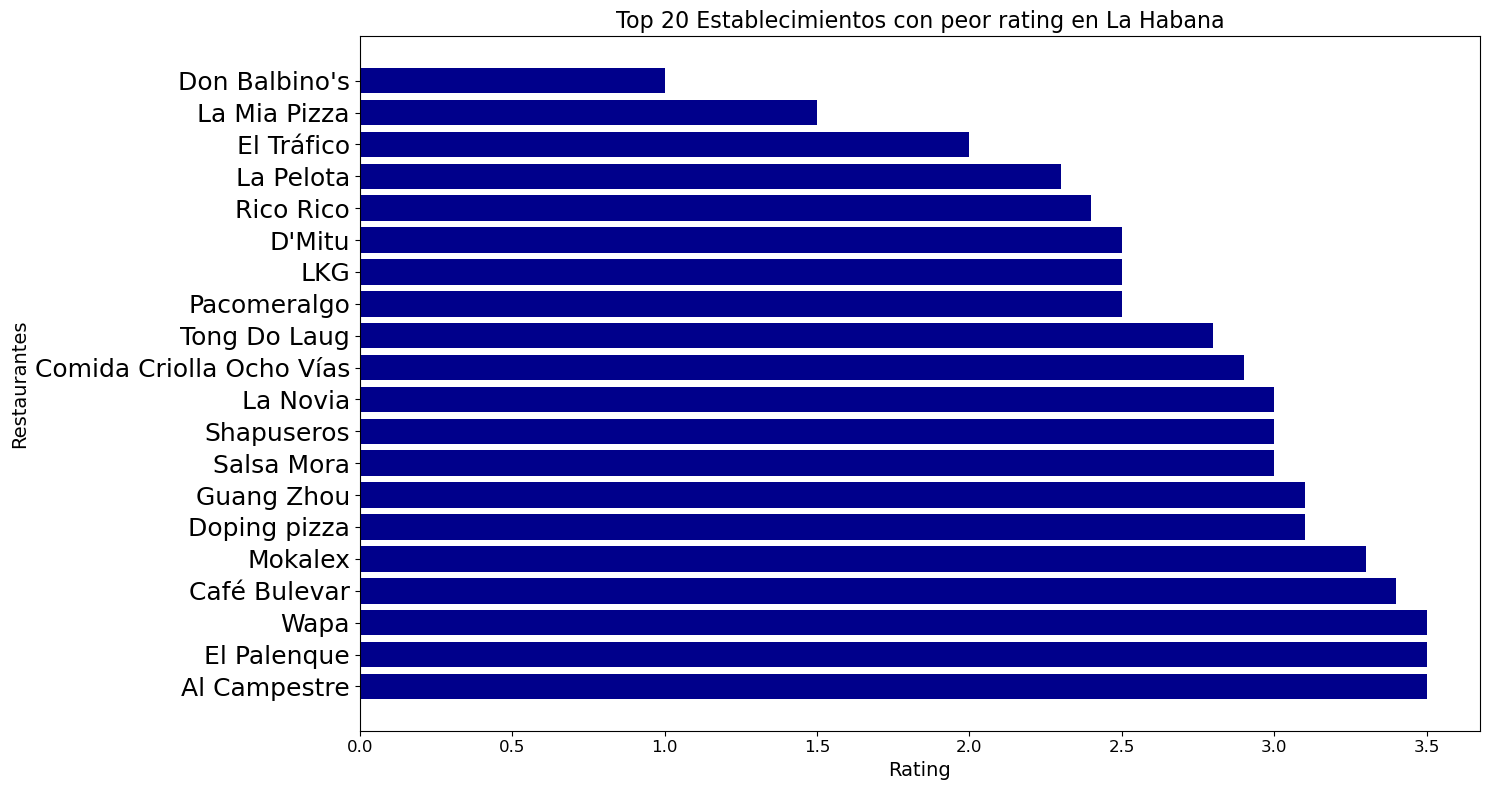

In [9]:
df_ordenado = df.sort_values(by='rating', ascending=False).tail(51) #Ordena de mayor a menor y escoge las ultimas 51 lineas.
veinte_peores = df_ordenado.iloc[:20,:] #Se queda con las 20 primeras, las otras 31 son 0.

plt.figure(figsize=(15, 8)) 
plt.barh(veinte_peores['name'], veinte_peores['rating'], color='darkblue')
plt.title('Top 20 Establecimientos con peor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout() 
plt.show()

Después de los resultados arrojados por las anteriores gráficas fue seleccionado uno de los establecimientos con rating 5.0, el bar - restaurante "El Gabán" del municipio Playa, para ser comparado con el de peor rating 1.0, el bar - restauarnte "Don Balbino's" de San Miguel del Padrón con el fin de analizar las causas de la gran diferencia de valoración del público a ambos establecimientos. 

Ambos abren todos los días de la semana y aceptan tanto pagos en efectos como por transferencia, pero el primero de estos cuenta con página web, Facebook e Instagram a diferencia del segundo. "Don Balbino's", con una capacidad alta, ofrece comida criolla e internacional, mientras que "El Gabán", con capacidad media también ofrece especialidades de cocina internacional. 

En cuanto a servicios el establecimiento de San Miguel ofrece servicios como espacios adecuados para el cuidado de niños, sistema de reservas y actividades interactivas, mientras el de Playa tiene además parqueo, planta eléctrica y espacios exclusivos.

Entonces, ¿Qué hay del rango de precios entre entrantes, platos principales, bebidas y postres? ¿Varía mucho entre estos dos puntos extremos? 

In [10]:
rangos = {
    "El Gabán": {
        "appetizers": 3600,
        "main_courses": 4800,
        "drinks": 1700,
    },
    "Don Balbino's": {
        "appetizers": 2200,
        "main_courses": 2150,
        "drinks": 450,
    }
}
df = pd.DataFrame.from_dict(rangos, orient='index').reset_index()
df.columns = ['Restaurante'] + list(df.columns[1:]) 

df_mezcla = df.melt(id_vars='Restaurante', var_name='Sección del Menú', value_name='Rango de Precios')

fig = px.bar(df_mezcla,
             x='Sección del Menú',
             y='Rango de Precios',
             color='Restaurante',
             barmode='group',
             title='Comparación de Rangos de Precios entre Restaurantes',
             color_discrete_sequence=px.colors.sequential.Turbo)  

fig.show()

-"Saber los mejores y peores está bien, así lo puedes tener en cuenta para cada ocasión, pero ¿no crees que siempre es necesario conocer el punto medio? Muchas veces, un sitio con un rating medio puede tener reseñas mixtas. Algunos clientes pueden haber tenido una experiencia positiva, mientras que otros pueden haber encontrado fallos.-expresó Laura, animándose a opinar". 
-"Además, podríamos crear una sección en nuestra web donde destacamos estos lugares. Esto no solo beneficiaría a los restaurantes, sino que también proporcionaría a nuestros usuarios opciones más variadas."

¿Cuáles serán de esos lugares aquellos que tienen una calificación aceptable?
Para ello el grupo comenzó a analizar datos sobre restaurantes con ratings entre 3.0 y 4.0.


In [15]:
df_m = df.copy(deep=True)
df_m[df_m["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_ratings_ordenados = df_m.sort_values(by='rating', ascending=False) #Ordena los rating de mayor a menor
a = df_ratings_ordenados.iloc[:-31,:] #Quita los ultimos 31, son los de rating "null" que hicimos 0.
most_access = a[(a['rating'] >= 3.0) & (a['rating'] <= 4.0)].copy(deep = True) #Deja solo los que tengan rating dentro del intervalo indicado
#print(most_access)
fig = px.bar(most_access, 
            x='name', 
            y='rating', 
            title='Establecimientos con Rating entre 3.0 y 4.0',
            labels={'name': 'Nombres de los establecimientos', 'rating': 'Rating'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(xaxis_tickangle=-70) 
fig.show()

#print(df_ratings_ordenados.iloc[df_ratings_ordenados.shape[0]-1])

¿Eres más de comida tradicional o te gusta probar cosas nuevas todo el rato? Se sabe que la mayoría de los establecimientos ofrece comida criolla, cubana, pero después de esa ¿cuál es el tipo de comida que se oferta en mayor cantidad sitios?
Era un martes en la tarde y los chicos se habían reunido para hacer lluvia de ideas cuando surgió esa duda. 

— No sé, yo prefiero lo tradicional. No hay nada como una buena una ropa vieja. La comida cubana tiene tanto sabor e historia. -afirmó Luis. 

— Pero piensa en todas las opciones que hay ahora. La Habana no solo tiene comida criolla y cubana; hay influencias de la cocina internacional que están empezando a aparecer en los menús.-lo corrigió Paolo.

— Ambas tienen lo suyo, en todo caso nuestra labor no es tomar partido, sino reflejar la verdad para que el usuario sea libre de eligir por sí mismo. A simple vista he podido notar que la mayoría sigue ofreciendo comida cubana tradicional como lechón asado y yuca con mojo, pero también hay una gran influencia de otros tipos de comidas. -intervino Laura de forma imparcial.

In [16]:
cocina = df['cuisine'].explode()  # Separa cada elemento de las listas

conteo_cocina = cocina.value_counts().reset_index()
conteo_cocina.columns = ['Tipo de Cocina', 'Cantidad']

fig = px.bar(conteo_cocina, 
            x='Tipo de Cocina', 
            y='Cantidad', 
            title='Cantidad de Establecimientos por Tipo de Cocina',
            labels={'Cantidad': 'Cantidad de Establecimientos', 'Tipo de Cocina': 'Tipo de Cocina'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Turbo)

fig.update_layout(xaxis_tickangle=-45) # Rotar las etiquetas de x

fig.show()

— Espera, ¿comida libanesa? ¿ceilanesa? ¿cajún? ¿Qué es comida cajún?  

— Jaja, esa viene del estado de Lousiana, en Estados Unidos.-intervino la enciclopedia andante del grupo.

— Pues yo no tenía idea que eso existía y mucho menos que la podíias encontrar en un restaurante de La Habana. ¿Qué lugares ofrecen esas comidas únicas? ¿Tú crees que a la gente le guste bastante ese estilo un poco más exótico?-contestó Paolo mientras daba pie a un análisis bastante interesante.

In [39]:
cocina = df['cuisine'].explode()

count_cocina = cocina.value_counts().reset_index() # Cuenta cuantas veces aparece cada tipo de cocina
count_cocina.columns = ['Tipo de Cocina', 'Cantidad']

tipos_unicos = count_cocina[count_cocina['Cantidad'] == 1]['Tipo de Cocina'] # Se queda con los q solo salen una vez

restaurantes_unicos = df[df['cuisine'].apply(tiene_tipo_unico, tipos_unicos = tipos_unicos)] # Del df original se queda con los lugares con tipos únicos
restaurantes_info = restaurantes_unicos[['name', 'rating', 'cuisine']]

restaurantes_info['Tipo de Cocina Único'] = restaurantes_info['cuisine'].apply(obtener_tipo_unico, tipos_unicos = tipos_unicos)

fig = px.bar(restaurantes_info, 
            x='name', 
            y='rating', 
            title='Ratings de Restaurantes con Tipos de Cocina Únicos',
            labels={'rating': 'Rating', 'name': 'Nombre del Restaurante'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Turbo,
            hover_data={'Tipo de Cocina Único': True})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

-Por cierto, poco se habla de que el segundo tipo de comida ofertado en mayor número de establecimientos es de Italia. ¡Ya la cocina italiana es casi tan cubana como el congrí!-dijo Paolo en un tono divertido.

-Tiene sentido, por ejemplo la pizza es algo que se consume mucho porque es bastante rápida de hacer, sin contar que es riquísima. -respondió Laura. ¿Tú crees que gran parte de los establecimientos tengan ofertas de pizza en sus menú?

In [16]:
total_con_pizza = pizza(df)
total_de_establecimientos = len(df)
total_sin_pizza = total_de_establecimientos - total_con_pizza 

df_pizza = pd.DataFrame({'Estado': ['Con Pizza', 'Sin Pizza'], 'Total': [total_con_pizza, total_sin_pizza]})
fig = px.pie(df_pizza, 
            values='Total',
            names='Estado',
            title='Proporción de Establecimientos con y sin Pizza',
            color_discrete_sequence=px.colors.sequential.Turbo,
            )
fig.show()

Efectivamente la pizza estaba en las cartas de más de la mitad de establecimientos, pero ¿qué más hay en sus menú?

Mientras el grupo de amigos continuaba su trabajo en "Chill Havana", notaron que ya se habían hecho muchas preguntas pero no se había hablado de un elemento crucial: el menú de cada establecimiento. Estaban conscientes de cuan importante es tener un menú accesible en su web. 
¿Recuerdas cuántas veces has ido a un restaurante y no has encontrado eso que tanto deseabas comer, o simplemente no te interesaba ninguna de las opciones de la carta? ¿En cuántas ocasiones te has interesado por conocer los precios de un sitio antes de ir? Es una experiencia común el poder saber todo del lugar que vas a visitar para de esa forma evitar decepciones.


Siguiendo esa idea lo primero a estudiar fue cuántos restaurantes por municipio ofrecían ofertas para la primera comida del día: desayunos. 

In [17]:
df['desayuno'] = df['menu'].apply(tiene_desayuno) 

resultados = df[df['desayuno']].groupby('district').size().reset_index(name='count')# Agrupar por distrito y contar el número de establecimientos

fig = px.bar(resultados, 
            x='district', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Establecimientos que Ofertan Desayuno por Municipio',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            color_continuous_scale=px.colors.sequential.Turbo,
            text='count')
fig.show()

Como resultado notaron que no era común tener este tipo de ofertas en los distintos establecimientos.

Con la misma lógica analizaron qué número de lugares en cada municipio habanero contaba con ofertas especiales en su menú que podía ir desde sugerencias del chef hasta menú infantil o ejecutivo.

In [17]:
df['special_offers'] = df['menu'].apply(tiene_ofertas_especiales)
resultados = df[df['special_offers']].groupby('district').size().reset_index(name='count')

fig = px.bar(resultados, 
            x='district', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Establecimientos con Ofertas Especiales por Municipio',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            text='count',
            color_continuous_scale=px.colors.sequential.Turbo) 
fig.show()

¿Recuerdan que una de las primeras cosas que notamos es que el tipo de establecimiento más común eran los restaurantes? Estos representaban el 62.2% del total analizado. Su diferencia con un bar-restaurante es que no ofrecen una carta tan amplia de bebidas alcohólicas, sino que se enfocan más en la variedad de comida, por lo tanto sería interesante preguntarse cuántos restaurantes tienen al menos una bebida alcohólica en sus cartas. Haciendo este análisis por municipio se puede comparar como varía esta caracterítica de los restaurantes en cada uno de ellos.

In [18]:
df_restaurantes = df[df['type_of_establishment'] == 'restaurante']

df_restaurantes['alcohol'] = df_restaurantes['menu'].apply(tiene_alcohol)
resultados_alcohol = df_restaurantes[df_restaurantes['alcohol']].groupby('district').size().reset_index(name='count')

fig_alcohol = px.bar(resultados_alcohol, 
                    x='district', 
                    y='count', 
                    color='count', 
                    barmode='group',
                    title='Cantidad de Restaurantes que Ofrecen Alcohol por Municipio',
                    labels={'district': 'Municipio', 'count': 'Número de Restaurantes'},
                    text='count',
                    color_continuous_scale=px.colors.sequential.Turbo)
fig_alcohol.show()

De esta forma quedó claro que incluso en restaurantes era común ofertar bebidas con alcohol.

-Yo no sé ustedes pero yo si no como postre al final siento que no he comido nada.-dijo Rebecca.

-100% real, incluso aunque te sientas muy lleno siempre hay huequito para el postre.-respondió Laura. Pero me ha pasado mucho que voy a un lugar y no tienen ofertas dulces. 

-Oye pero de aquí sale otro análisis importante. Imagina que te pase como a Rebecca, que comas y al final como no tienen postres te quedes como si no hubieras comido. -expresó Paolo mientras bromeaba.

-Vamos a averiguar cuál es el municipio más dulcero, a ver si me mudo para allá, jaja.-incitó Rebecca.

In [19]:
df['tiene_postres'] = df['menu'].apply(postres)

dessert_counts = df.groupby('district')['tiene_postres'].sum().reset_index()
dessert_counts.rename(columns={'tiene_postres': 'number_of_establishments'}, inplace=True)

fig = px.bar(dessert_counts,
             x='district',
             y='number_of_establishments',
             title='Número de Establecimientos que Ofrecen Postres por Municipio',
             labels={'district': 'Municipio', 'number_of_establishments': 'Número de Establecimientos'},
             color='number_of_establishments',
             color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

Con lo anteriores gráficos se observó que los tres municipios principales del estudio cuentan con establecimientos que además de las típicas ofertas tienen desayunos, ofertas especiales, alcohol y postres. 
También se pudo notar que lo menos común es el desayuno, encontrado solo en 6 de los 15 municipios habaneros 

La información de si Rebecca se mudó para Playa es algo de lo que no se tiene conocimiento aún, pero a cambio se sabe con certeza que otro análisis que les pareció revelador fue ver cuál era el plato más costoso y menos costoso por municipio.

— Esto nos dará una perspectiva clara sobre la diversidad económica de la gastronomía en los distintos lugares de La Habana.-expresó Lucía con entusiasmo.

— Exacto. El plato más caro puede indicar un enfoque hacia una experiencia gastronómica única, mientras que el más barato puede mostrar opciones accesibles para toda la población.-enfatizó Luis.

In [20]:
df_copia = df.copy(deep=True)
#print(df_copia)

aux = aplicar_fun_mayor(df_copia)

def f(tupla):
    return tupla[1]

resultadoss = []
district = list(df["district"].unique())
for i in district:
    dfi = aux[aux["district"] == i]
    m = max(dfi["platillo_mas_costoso"], key = f)
    a, c = m
    new_tuple = i, a, c
    resultadoss.append(new_tuple)
    
r = pd.DataFrame(resultadoss)
r.columns = ['district', 'platillo_mas_costoso', 'precio']
#print(r)

fig = px.bar(r, 
            x='district', 
            y='precio', 
            color='precio',
            text='platillo_mas_costoso',
            title='Platillos Más Costosos por Municipio',
            labels={'district': 'Municipio', 'precio': 'Precio'},
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

In [21]:
df_copia_men = df.copy(deep=True)
#print(df_copia)

aux = aplicar_fun_menor(df_copia_men)

def f(tupla):
    return tupla[1]

resultadosss = []
district = list(df["district"].unique())
for i in district:
    dfi = aux[aux["district"] == i]
    m = min(dfi["platillo_menos_costoso"], key = f)
    a, c = m
    new_tuple = i, a, c
    resultadosss.append(new_tuple)
    
r = pd.DataFrame(resultadosss)
r.columns = ['district', 'platillo_menos_costoso', 'precio']
#print(r)

fig = px.bar(r, 
            x='district', 
            y='precio', 
            color='precio',
            text='platillo_menos_costoso',
            title='Platillos Menos Costosos por Municipio',
            labels={'district': 'Municipio', 'precio': 'Precio'},
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

Paolo, siempre entusiasta, propuso una nueva idea.
— ¿Y si hacemos un análisis comparativo de los precios máximos y mínimos de un plato determinado en cada municipio en los restaurantes de rating entre 3.0 y 4.0 que son los más accesibles? 

— ¡Eso sería increíble! Así podríamos mostrar a los usuarios no solo qué comer, sino también cuánto deberían esperar pagar dependiendo de su ubicación. Esto podría ayudarles a planificar mejor sus salidas.-añadió Rebecca.

In [22]:
resultados = filtrar_precios(most_access, "pollo") 
print(resultados)

                 municipio  plato  precio_minimo  precio_maximo
0   Plaza de la Revolución  pollo            400           3000
1                  La Lisa  pollo            500           2000
2                 Marianao  pollo            500            900
3            Centro Habana  pollo           1300           3975
4          La Habana Vieja  pollo            300           1600
5                    Playa  pollo            250           5000
6    San Miguel del Padrón  pollo            500           3650
7           Arroyo Naranjo  pollo            750           1600
8                    Cerro  pollo            175            500
9               Guanabacoa  pollo            450            950
10         Diez de Octubre  pollo            500           2500
11                 Cotorro  pollo            400           1800
12                 Boyeros  pollo            900           1020
13         Habana del Este  pollo            250           1960


A partir de los precios máximos y mínimos de un determinado plato es posible establecer una comparación entre los precios medios de este en los distintos municipios de La Habana que lo ofertan.

In [23]:
resultados = precio_promedio(most_access, "pollo")

if isinstance(resultados, pd.DataFrame) and not resultados.empty:
    fig = px.bar(resultados,
                 x='municipio',
                 y='precio_promedio',
                 title='Precio Promedio del Plato por Municipio',
                 labels={'municipio': 'Municipio', 'precio_promedio': 'Precio Promedio'},
                 color='precio_promedio', 
                 color_continuous_scale=px.colors.sequential.Turbo) 
    fig.show()
else:
    print(resultados)

Inicialmente su idea era que su página tuviera fotos de los menú o algún enlace hacia estos, pero hablando con Luis se dieron cuenta que estaba en sus manos hacer algo más óptimo que facilitara al cliente a elegir el sitio que tuviera un plato específico y a un precio menor que un límite especificado, y no solo eso, ¡también podrías elegir el municipio del mismo y que contara con un servicio determinado! 

Esto definitivamente marcaría la diferencia y los dejaría listos para lanzar la versión inicial de su proyecto. Así nació una de las funciones más importantes de su proyecto: "Tu sitio ideal", capaz de recomendar al usuario un establecimiento específico basado en sus preferencias y condiciones.

In [25]:
sitio_recomendado(most_access, "helado", 300, "parking", "Playa")

type_of_establishment                                          restaurante
name                                                           El Tocororo
district                                                             Playa
coordinates              {'latitude': 23.124905240397386, 'longitude': ...
contact                  {'phone_number': '72024530', 'e-mail': False, ...
schedule                 {'monday': {'open': '1200', 'close': '2300'}, ...
rating                                                                 4.0
intake_capacity                                                       alta
cuisine                                        [criolla, caribeña, latina]
services                 {'plant': False, 'child_care': True, 'disable_...
pay_meth                                  {'cash': True, 'transfer': True}
menu                     {'breakfasts': False, 'appetizers': {'items': ...
tiene_redes                                                          False
cumple_name_price        

##### PARTE II

Después de meses de una extensa recopilación de datos que implicó muchísimo esfuerzo, tiempo y paciencia para lidiar con toda clase de personas a lo largo y ancho de la capital, sumada a muchas horas de aprendizaje para analizar datos y ofrecer resultados claros, la web fue lanzada recibiendo una gran aceptación por parte de la gente. 
Si bien sabían que esto solo era un punto de partida para un proyecto mucho más grande con mejoras constante para adaptarse a las necesidades de las personas, estaban muy satisfechos por lo logrado.

Ese mismo día decidieron salir a celebrar la victoria cuando se toparon con un problema cotidiano: el transporte. El "¿cómo llegar a tu destino?" era algo que no habían contemplado aún en ninguno de sus análisis previos. Era fundamental proporcionar detalles sobre el transporte público en La Habana, especialmente las rutas de autobuses según el municipio elegido como origen y destino. Esta idea sería de muchísima ayuda para todas esas personas que muy a menudo se sienten perdidos al intentar navegar por la ciudad.
La falta de información clara sobre las rutas de autobuses era algo que ya ellos no podían ignorar.

In [19]:
buses = pd.read_csv('C:/Users/andre/Desktop/Chill_Havana_Project/Project/ext_files/name.csv')
#print(buses)
         
ruta_ideal("Playa", "Habana del Este", buses)

No hay rutas directas de Playa a Habana del Este, pero aquí se ofrecen otras rutas que llegan al destino
La/s ruta/s a Habana del Este es/son:
    Bus name                 Origin
7         P8         Arroyo Naranjo
16        PC                La Lisa
24        A7                Cotorro
34       A17  San Miguel del Padrón
38       A21                Cotorro
40       A26        Habana del Este
46       A32                  Cerro
51      A42L        Habana del Este
56       A49        Habana del Este
66       A63        Habana del Este
76       A72                  Regla
116     C1CF                Cotorro
118       C4        Habana del Este
119       C5        Habana del Este
120      C5L        Habana del Este
122       C7        Habana del Este


Esa noche fue muy divertida para los jóvenes hasta que la fiesta terminó y era hora de ir a casa. Al salir todos tenían mucha hambre, por lo que decidieron ir a comer algo antes de volver. Haciendo uso de su proyecto se pusieron a buscar lugares en su página, pero eran las 3am y evidentemente se toparon con que muchos de los establecimientos ya no estaban ofreciendo servicio a esas horas. "¿Qué lugar estará abierto?" Fue la pregunta que invadió sus mentes. Al final, luego casi una hora de búsqueda, encontraron uno y todo salió como querían, pero estaba claro que esto había revelado una necesidad: conocer de forma exacta cuáles eran aquellos lugares que ofrecían un servicio de 24 horas. 

In [20]:
opened_24h = []
coordinates_24h = []
for index, row in df.iterrows(): 
    nombre_restaurante = row['name']
    horario = row['schedule'] 
    coordinates = row['coordinates']
    
    if not isinstance(horario, dict):
        continue 
    
    abierto_24 = True 
    for dia in horario:
        if isinstance(horario[dia], dict): 
            if 'open' in horario[dia] and 'close' in horario[dia]:
                if horario[dia]['open'] != '0000' or horario[dia]['close'] != '2400':
                    abierto_24 = False 
                    break
            else:
                abierto_24 = False
                break
        else:
            abierto_24 = False
            break
        
    if abierto_24:
        opened_24h.append(nombre_restaurante)
        coordinates_24h.append(coordinates) 
        
if opened_24h:
    print("Restaurantes abiertos las 24 horas:")
    for restaurante in opened_24h:
        print(f"-{restaurante}")
        
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)

for nombre_restaurante, coords in zip(opened_24h, coordinates_24h):
    latitude = coords['latitude']
    longitude = coords['longitude']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=nombre_restaurante,
        icon=folium.Icon(color='darkblue', icon='cutlery', prefix='fa')
    ).add_to(mapa)

mapa

Restaurantes abiertos las 24 horas:
-Bocattas
-Pechatniky
-Qbanas 60
-Qué chévere
-Ranchon de 41
-Sport Bar


Notando que ni el 2% de los establecimientos ofrecía un servicio de 24h surgió otro cuestionamiento: 

¿Cuál es la hora de cierre más frecuente en bares y restaurantes de La Habana?

In [24]:
closing_times = []
for index, row in df.iterrows():
    schedule = row['schedule']
    for day, hours in schedule.items():
        closing_time = hours.get('close')  
        if closing_time and closing_time != False: 
                closing_times.append(closing_time)  

time_counts = Counter(closing_times)

common_time = time_counts.most_common(1)

hour, count = common_time[0]
if hour == "2400":
    print(f"La hora más común de cierre es 12:00am.")

La hora más común de cierre es 12:00am.


Al darse cuenta de que había una preocupante falta de opciones que operaran las 24 horas y que la mayoría de los establecimientos cerraban a la medianoche entendieron que el tema de los horarios limitaba las posibilidades para aquellos que querían disfrutar de una salida fuera de horas tan concurridas.

Este descubrimiento encendió una chispa en el grupo: analizar la disponibilidad real de los lugares, algo que podría ser crucial para sus usuarios. 

¿Qué porciento de los establecimientos representaban aquellos que no abrían a diario? ¿Cuáles eran los nombres de estos? Fueron algunas de las preguntas que azotaron sus mentes.

In [25]:
total_establecimientos = len(df)
abren_todos_los_dias = 0
no_abren_todos_los_dias_lista = []

for index, row in df.iterrows():
    schedule = row['schedule']
    if all(hours.get('open', False) for hours in schedule.values()):
        abren_todos_los_dias += 1
    else:
        no_abren_todos_los_dias_lista.append(row['name'])

no_abren_todos_los_dias = total_establecimientos - abren_todos_los_dias

print(f"Establecimientos que abren todos los días: {abren_todos_los_dias}")
print(f"Establecimientos que no abren todos los días: {no_abren_todos_los_dias}")

labels = ['Abren Todos los Días', 'No Abren Todos los Días']
sizes = [abren_todos_los_dias, no_abren_todos_los_dias]

df_pie = pd.DataFrame({'Estado': labels, 'Cantidad': sizes})

fig = px.pie(df_pie, 
            values='Cantidad', 
            names='Estado',
            title='Porcentaje de Establecimientos que Abren Todos los Días',
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

print("Los establecimientos que no abren todos los días son:")
for nombre in no_abren_todos_los_dias_lista:
    print(f"-{nombre}")

Establecimientos que abren todos los días: 184
Establecimientos que no abren todos los días: 22


Los establecimientos que no abren todos los días son:
-Macarena
-Café literario La Copa
-Coco Blue y la Zorra Pelua
-Doña Almira
-El Pelícano
-El pórtico
-El Bache
-El Cocal
-Hábitat
-Ranchon Hanoi
-La Baliza
-La Patrona
-McCesar's
-Mokalex
-Ole Ole
-Otra manera
-Ranchon El Pinareño
-Ruta 66
-Salchipizza
-Toros y Tapas
-Vale & Vane
-Yesterday Havana


Pero entonces, ¿cuáles serán los días con mayor cantidad de establecimientos abiertos?

In [26]:
contadores = {
    'monday': 0,
    'tuesday': 0,
    'wednesday': 0,
    'thursday': 0,
    'friday': 0,
    'saturday': 0,
    'sunday': 0
}

for index, row in df.iterrows():
    schedule = row['schedule']
    if isinstance(schedule, dict):
        for day in contadores.keys():
            if day in schedule and isinstance(schedule[day], dict) and 'open' in schedule[day]:
                if schedule[day]['open']:  
                    contadores[day] += 1

data = pd.DataFrame({
    'Día': list(contadores.keys()),
    'Total Abiertos': list(contadores.values())
})
fig = px.bar(data, 
            x='Día', 
            y='Total Abiertos', 
            title='Número de establecimientos que abren cada día',
            labels={'Total Abiertos': 'Número de Establecimientos'},
            color='Total Abiertos',
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

Se notó que el día donde mayor cantidad de sitios brindan servicio es el jueves, seguido del viernes y el sábado.

Para el perfeccionamiento constante de su web el grupo se mantenía al tanto de las opiniones que tenían los usuarios sobre el proyecto cuando un día, uno llamó particularmente su atención: "Pq Chill Havana? Ahora se usa poner los nombres en inglés parece". Fue justo ese comentario el que los llevó a hacer distintos análisis precisamente con el nombre de los establecimientos. ¿Cuántos lugares poseen nombres en inglés? ¿Influye esto de alguna forma en su rating? 

In [30]:
ruta_dict = 'C:/Users/andre/Desktop/Chill_Havana_Project/Project/ext_files/words.txt' 
diccionario_ingles = load_dict(ruta_dict)

df['english_name'] = df['name'].apply(ingles, diccionario_ingles=diccionario_ingles)
resultados_ingles = df[df['english_name']]
resultados_ingles_rating = resultados_ingles[resultados_ingles['rating'].notna()]

fig = px.bar(resultados_ingles_rating, 
            x='rating', 
            y='name', 
            orientation='h', 
            title='Calificaciones de Restaurantes con Nombres en Inglés',
            labels={'name': 'Nombre del Restaurante', 'rating': 'Calificación'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

De los establecimientos analizados los resultados arrojaron que 16 poseen nombres en inglés, de ellos 12, es decir, el 75% poseen calificaciones altas entre 4.0 y 5.0. Entonces, ¿realmente influye eso en su rating? Los nombres en inglés suelen transmitir una sensación de modernidad y globalidad, atrayendo a una audiencia más amplia, incluidos turistas y locales que buscan experiencias que resuenen con tendencias internacionales. Esto puede hacer que el establecimiento se perciba como más cosmopolita y atractivo.

-Ya que estamos en esto de los nombres, ¿por qué no estudiamos cuáles son las letras iniciales más frecuentes en los nombres de los sitios?-dijo Amanda casi gritando de entusiasmo.

-¿Amanda? Are you ok? Tú ni hablas y ahora literalmente gritas por unas letricas?.-bromeó Paolo.

-¿Letricas? Oye, eso podría significar algo. Tal vez hay una tendencia en la forma en que los dueños eligen los nombres. La elección de ciertas letras puede estar influenciada por tradiciones de la historia de la gastronomía cubana. Tal vez había un legado en el uso de ciertas letras que resonaba con la cultura habanera. Además, hay letras que pueden sonar más atractivas o pegajosas para el oído. Quizás hay un atractivo particular en esas letras que resuena con la gente

-Amanda, relax, vamos a analizar lo de las letras.-intervino Luis para cortar el momento de "rabia inspiradora" de su amiga. 

In [27]:
numbers = [str(i) for i in range(10)]

df['first_letter'] = df['name'].str[0].str.upper()
df_sin_numbers = df[~df['first_letter'].isin(numbers)]

letra_counts = df_sin_numbers['first_letter'].value_counts().reset_index()
letra_counts.columns = ['first_letter', 'count']

fig = px.bar(letra_counts, 
            x='first_letter', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Restaurantes por Letra Inicial del Nombre',
            labels={'first_letter': 'Letra Inicial', 'count': 'Número de Restaurantes'},
            text='count',
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

Con el cuestionamiento notaron que encabezando la lista se encontraba la letra "L", seguida por la letra "E", lo que efectivamente denotó una amplia tendencia en La Habana a iniciar los nombres de los establecimientos con artículos. Eso no quedó ahí porque siguiendo el instinto de Amanda decidieron investigar el porqué de los resultados arrojados. 

Los nombres que comienzan con artículos crean una sensación de familiaridad y pertenencia, haciendo que el lugar suene acogedor y accesible. Desde una perspectiva de marketing, los nombres que incluyen artículos pueden ser más memorables y pegajosos, facilitando la recordación cuando se trata de decidir dónde comer.

El estudio arrojó además que la palabra más repetida en los nombres era "café", término que puede ser atractivo para los clientes porque evoca imágenes de calidez y hospitalidad.

In [28]:
todas_las_palabras = []
for nombre in df['name']:
    if isinstance(nombre, str):
        palabras = nombre.lower().split()
        todas_las_palabras.extend(palabras)

descartadas = ["la", "el", "de"]

frecuencia_palabras = {}
for palabra in todas_las_palabras:
    if palabra in frecuencia_palabras and palabra not in descartadas:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

palabra_mas_comun = None
conteo_maximo = 0

for palabra, conteo in frecuencia_palabras.items():
    if conteo > conteo_maximo:
        conteo_maximo = conteo
        palabra_mas_comun = palabra

print(f"La palabra que más repetida en los nombres es '{palabra_mas_comun}', con un total de {conteo_maximo} veces.")

La palabra que más repetida en los nombres es 'café', con un total de 14 veces.


—Oye, ¿cuántos lugares crees que realmente sirven café? —preguntó Paolo, mientras removía esta bebida precisamente.

—No sé, pero si "café" es la palabra más repetida, deben ser un montón —respondió Laura.

—Eso suena genial. Podríamos analizarlo y además ver cuál es el tipo de café que hay en mayor número de lugares. —sugirió Luis. De hecho deberíamos dedicarle una sección completa de la página web. 

—Sí, sí, y en ella incluir comentarios sobre la calidad del café. ¡Imagínate! "El mejor café en La Habana se encuentra en..." —dijo Laura, sonriendo al pensar en las posibilidades.

In [29]:
total_establecimientos = len(df)
count_coffee = sum(
    1 for index, row in df.iterrows()
    if row['menu'].get('drinks') and isinstance(row['menu']['drinks'].get('coffee'), list) and row['menu']['drinks']['coffee']
)

print(f"Cantidad de establecimientos que ofrecen café: {count_coffee}")

labels = ['Establecimientos con Café', 'Establecimientos sin Café']
sizes = [count_coffee, total_establecimientos - count_coffee]

fig = px.pie(values=sizes, 
            names=labels,
            title='Proporción de Establecimientos que Ofrecen Café',
            color_discrete_sequence=['#D2B48C', '#A0522D'])

fig.show()

Cantidad de establecimientos que ofrecen café: 98


##### PARTE III

Era un día como cualquier otro en La Habana, pero de repente, la ciudad se sumió en la oscuridad. Una caída del Sistema Eléctrico Nacional había provocado un apagón masivo que afectó a millones de cubanos. En ese momento incluso al grupo de jóvenes se les complicó comunicarse para hablar sobre los avances del proyecto. Todo la población tenía su mente en la situación actual y uno de los principales problemas de ese momento era la comida. Los amigos de "Chill Havana", que estaban trabajando en su proyecto, se dieron cuenta de que la situación había cambiado drásticamente. Se volvió urgente la necesidad de conocer cuáles lugares contaban con planta eléctrica para continuar ofreciendo servicio en medio de la crisis. 

In [30]:
services_df = pd.json_normalize(df['services'])
con_planta = services_df[services_df['plant'] == True].index
resultado = df.loc[con_planta, ['name', 'district']]
resultado = resultado.reset_index(drop=True)

#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None)  
#pd.set_option('display.width', None)  
#pd.set_option('display.max_colwidth', None)  
resultado

,name,district
0,28 y Mar,Playa
1,5ta Billar,Regla
2,Abuelo D'Oro,Boyeros
3,Aires de Cojimar,Habana del Este
4,Amalfi,Playa
...,...,...
92,Tu Tiempo,Centro Habana
93,Vale & Vane,Guanabacoa
94,Villarino,Playa
95,Vita Nuova,Plaza de la Revolución


— Sin la electricidad toda comunicación por redes móviles se vuelve casi imposible, ¿Cómo van las personas a averiguar si los establecimientos están abiertos o no?-indagó Paolo.

— Tienes razón, creo que es muy importante también tengan teléfonos fijos para que la gente pueda llamar y confirmar en tiempos así de difíciles. ¿Qué zonas de La Habana contarán con mayor establecimientos preparados para estas situaciones?

In [31]:
contact_df = pd.json_normalize(df['contact'])
df_combined = df.join(services_df, rsuffix='_service').join(contact_df, rsuffix='_contact')

resultado = df_combined[
    (df_combined['plant'] == True) & 
    (df_combined['phone_number'].notnull()) 
]
resultado_final = resultado[['name', 'district', 'coordinates']]
resultado_final = resultado_final.reset_index(drop=True)  

latitudes = []
longitudes = []
for index, row in resultado_final.iterrows():
    if isinstance(row['coordinates'], dict): 
        latitudes.append(row['coordinates']['latitude'])  
        longitudes.append(row['coordinates']['longitude'])  

heat_data = []
for i in range(len(latitudes)):
    if latitudes[i] is not None and longitudes[i] is not None:  
        heat_data.append([latitudes[i], longitudes[i]]) 

map_obj = folium.Map(location=[23.1150, -82.3700], zoom_start=12) 
HeatMap(heat_data).add_to(map_obj)
map_obj

-Eso es excelente, pero ¿por qué solo analizar esos dos aspectos? Hay otros servicios que la gente necesita saber si los establecimientos ofrecen, ya sea en este o en tiempos normales. Por ejemplo, si el lugar tiene delivery, si tiene fácil acceso para discapacitados, espacios adecuados para los niños, o cosas así.-comentó Laura.

¿Alguna vez han ido a un sitio que no ofrece todas las facilidades que necesitan?

In [32]:
service_counts = {service: 0 for service in df['services'][0].keys()} #cuenta lugares ofrecen cada servicio

for index, row in df.iterrows():
    for service, available in row['services'].items():
        if available:  # Si el servicio es True
            service_counts[service] += 1

df_servicios = pd.DataFrame(list(service_counts.items()), columns=['Servicio', 'Cantidad']) # Convertir a un df

nombre_servicios = {
    'plant': 'Planta Eléctrica',
    'child_care': 'Cuidado Infantil',
    'disable_support': 'Acceso para Discapacitados',
    'parking': 'Parqueo',
    'delivery': 'Domicilio',
    'reserves': 'Reservas',
    'takeaway': 'Para Llevar',
    'vip_zone': 'Zona VIP',
    'interactive_act': 'Actividades Interactivas'
}
df_servicios['Servicio'] = df_servicios['Servicio'].map(nombre_servicios)# Reemplazar los nombres

fig = px.bar(df_servicios, 
            x='Servicio', 
            y='Cantidad', 
            title='Comparativa de Servicios Ofrecidos por Establecimientos',
            labels={'Servicio': 'Servicios', 'Cantidad': 'Cantidad de Establecimientos'},
            color='Cantidad', 
            color_continuous_scale=px.colors.sequential.Turbo)
fig.show()

En el estudio de dichos servicios les conmovió especialmente el soporte hacia personas discapacitadas. A través de su investigación, descubrieron que existían esfuerzos significativos para mejorar la accesibilidad en el Centro Histórico de La Habana. Proyectos como el Plan Integral de Accesibilidad habían sido implementados para garantizar que las personas con discapacidades pudieran disfrutar de la ciudad en condiciones de seguridad y dignidad. Este plan se centraba en eliminar barreras físicas y promover un entorno más inclusivo.
Sin embargo, a pesar de estos esfuerzos, la realidad era que muchos establecimientos aún carecían de las adaptaciones necesarias. Las escaleras sin rampas, los baños no accesibles y la falta de información sobre accesibilidad eran problemas comunes. Esto llevó al grupo a reflexionar sobre cómo su plataforma podría ayudar a visibilizar estas deficiencias.

Decidieron incluir una sección en su sitio web dedicada a la accesibilidad de los locales donde se informaría qué establecimientos contaban con facilidades para personas con discapacidad en cada municipio. 

In [38]:
establecimientos_con_soporte("Centro Habana", df)

,name,type_of_establishment
68,El Biky,bar - restaurante
93,Galy Café,restaurante
99,Hamburgo,restaurante
120,Mimosa,restaurante
182,Salchipizza,restaurante
184,San Rafael 1051,restaurante
194,Tonyzz Bar,bar - restaurante


-Oye, Amanda, ¿algo que añadir? No me digas que tu papel en la historia era solo descubrir el significado oculto detrás de los artículos en el nombre de bares y restaurantes.-se burló Paolo en un tono amigable.

-Jeje, estás payaso ¿no me digas que tu papel en la historia era solo tirar chistecitos?-respondió Amanda con ironía-Pero ya en serio, siento que estaría interesante ver entre Playa, Plaza y Centro Habana, que son los municipios de los que tenemos más información, cuál tiene menos barreras físicas para personas con desventajas físicas.

In [40]:
df_disable_support = df[df['services'].apply(soporte)]
conteo_establecimientos = df_disable_support['district'].value_counts()

municipios_interes = ['Centro Habana', 'Plaza de la Revolución', 'Playa']
conteo_establecimientos = conteo_establecimientos[conteo_establecimientos.index.isin(municipios_interes)]

df_plot = conteo_establecimientos.reset_index()
df_plot.columns = ['Municipio', 'Cantidad de Establecimientos']

fig = px.bar(df_plot,
             x='Municipio',
             y='Cantidad de Establecimientos',
             title='Cantidad de Establecimientos con Soporte para Discapacitados',
             labels={'Municipio': 'Municipios', 'Cantidad de Establecimientos': 'Cantidad'},
             color='Cantidad de Establecimientos', 
             color_continuous_scale=px.colors.sequential.Turbo) 
fig.show()

Otra cuestión que valoraron como una facilidad ofrecida al cliente fue si los establecimientos contaban con transferencias entre sus métodos de pago.

In [33]:
count_transfer = 0
count_no_transfer = 0

for index, row in df.iterrows():
    if row['pay_meth'].get('transfer', False):  # Si acepta transferencia
        count_transfer += 1
    else:  # Si no acepta transferencia
        count_no_transfer += 1

data = {
    'Método de Pago': ['Transferencia', 'Sin Transferencia'],
    'Cantidad': [count_transfer, count_no_transfer]
}
df_pie = pd.DataFrame(data)

fig = px.pie(df_pie, 
            values='Cantidad', 
            names='Método de Pago', 
            title='Proporción de Establecimientos que Aceptan Transferencia',
            color='Método de Pago',
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

Notaron con esto que el 98.5% de los establecimientos aceptan transferencia gracias a la Resolución 93/2023 del Ministerio de Comercio Interior (Mincin) que subraya la obligatoriedad de las entidades dedicadas al comercio de asegurar a los consumidores el acceso y uso de los canales electrónicos de pago.


##### PARTE FINAL

Ya había pasado casi un año desde que los 5 locos habían cambiado totalmente la conciencia gastronómica de los habaneros. Estaba siendo un año de aprendizajes y mejora constante, de corregir errores de sus primeros pasos en ese mundo. Justo esa tarde los muchachos habían quedado de verse para hablar sobre un nuevo cuestionamiento del que ya habían estado recopilando información hace un par de semanas.

-A ver chicos, nuestra página va súper bien y ya hemos conseguido ayudar a muchas personas a tener total conciencia de las opciones a su disposición, pero realmente no hemos analizado qué tanto acceso tienen los habaneros a estas opciones.-dijo Laura rompiendo el hielo.

-Sí, sí, tienes razón, deberíamos tener en cuenta qué porciento representa el precio medio de un plato principal del salario medio por municipio.-confirmó Paolo.

Para ello usaron los datos de salario medio mensual en entidades estatales por municipio en 2022 del Anuario Estadístico de La Habana Edición 2023.

In [34]:
prices = []
for index, row in df.iterrows():
    district = row['district']
    if 'main_courses' in row['menu']:
        if isinstance(row['menu']['main_courses'], dict):
            main_courses = row['menu']['main_courses']['items']
            
            for course in main_courses:
                price = course.get('price') 
                if price is not None:
                    prices.append({'district': district, 'price': price})

prices_df = pd.DataFrame(prices)

prices_df['price'] = pd.to_numeric(prices_df['price'], errors='coerce')#Convierto la columna 'price' a float

precios_promedio = prices_df.groupby('district')['price'].mean().reset_index()#precio promedio por municipio
precios_promedio['average_price'] = precios_promedio['price'].round().astype(int)

salario_df = pd.read_json('C:/Users/andre/Desktop/Chill_Havana_Project/Project/ext_files/salario_medio_mensual.json')

salario_df = salario_df.reset_index()
salario_df.columns = ['district', 'average_salary']

result_df = pd.merge(precios_promedio[['district', 'average_price']], salario_df, on='district', how='left')#Combino los df

result_df['percentage_of_salary'] = (result_df['average_price'] / result_df['average_salary']) * 100 #Calculo el %

result_df['percentage_of_salary'] = result_df['percentage_of_salary'].round(2)#Redondear a dos decimales
result_df

,district,average_price,average_salary,percentage_of_salary
0,Arroyo Naranjo,1730,4204,41.15
1,Boyeros,1738,5427,32.03
2,Centro Habana,2223,4445,50.01
3,Cerro,1232,4599,26.79
4,Cotorro,1398,3745,37.33
5,Diez de Octubre,1731,3472,49.86
6,Guanabacoa,1510,5005,30.17
7,Habana del Este,1938,4732,40.96
8,La Habana Vieja,2503,4732,52.90
9,La Lisa,2456,5042,48.71


Notaron de esta forma que los precios del municipio Playa eran más elevados que el resto de municipios en relación con su salario mensual, sus platos principales tienen un costo aproximado de 2980 CUP que representa casi el 61% de sus 4889 CUP de salario medio. Mientras, en el otro extremo, el municipio de Regla con unos 962 CUP por plato, 19.2% de un salario de 5011 CUP.

Después del anterior análisis vino otro, uno más, dos, no podían evitar ya el hacerse preguntas y buscar siempre las respuestas. De esa forma se dieron cuenta que realmente su proyecto nunca acabaría porque más que un proyecto de bares y restaurantes en La Habana, era un proyecto de vida: estaban dentro del mundo de la Ciencia de Datos.